In [15]:
import numpy as np
import matplotlib.pyplot as plt

Shortest Path: [(0, 2), (2, 1), (1, 3), (3, 0)]
Shortest Path Length: 55.0


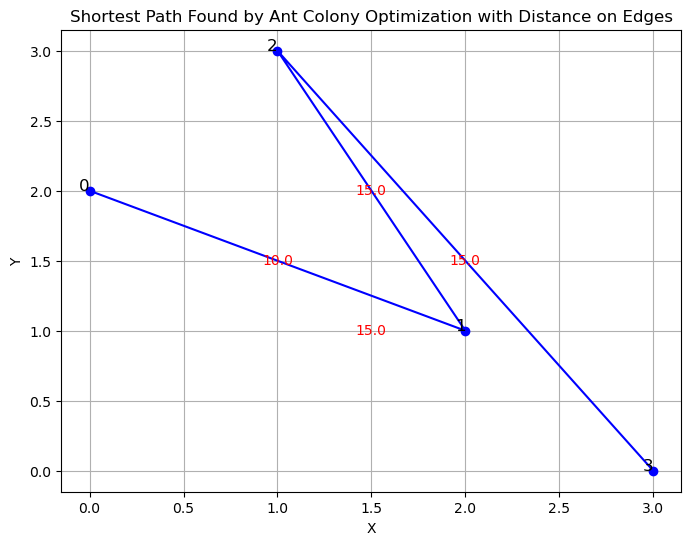

In [23]:
import numpy as np
import matplotlib.pyplot as plt

class AntColony:
    def __init__(self, distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        self.distances = distances
        self.pheromone = np.ones(self.distances.shape) / len(distances)
        self.all_inds = range(len(distances))
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
    
    def run(self):
        shortest_path = None
        shortest_path_length = np.inf
        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheromone(all_paths, self.n_best, shortest_path, shortest_path_length)
            shortest_path, shortest_path_length = self.get_shortest(all_paths)
            self.pheromone *= self.decay
        return shortest_path, shortest_path_length
    
    def spread_pheromone(self, all_paths, n_best, shortest_path, shortest_path_length):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        for path, dist in sorted_paths[:n_best]:
            for move in path:
                self.pheromone[move] += 1.0 / self.distances[move]
    
    def gen_path_dist(self, path):
        total_dist = 0
        for ele in path:
            total_dist += self.distances[ele]
        return total_dist
    
    def gen_all_paths(self):
        all_paths = []
        for i in range(self.n_ants):
            path = self.gen_path(0)
            all_paths.append((path, self.gen_path_dist(path)))
        return all_paths
    
    def gen_path(self, start):
        path = []
        visited = set()
        visited.add(start)
        prev = start
        for i in range(len(self.distances) - 1):
            move = self.pick_move(self.pheromone[prev], self.distances[prev], visited)
            path.append((prev, move))
            prev = move
            visited.add(move)
        path.append((prev, start))  # going back to where we started
        return path
    
    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0
        row = pheromone ** self.alpha * ((1.0 / dist) ** self.beta)
        norm_row = row / row.sum()
        move = np.random.choice(self.all_inds, 1, p=norm_row)[0]
        return move
    
    def get_shortest(self, all_paths):
        best_path = None
        best_path_length = np.inf
        for path, dist in all_paths:
            if dist < best_path_length:
                best_path_length = dist
                best_path = path
        return best_path, best_path_length


def visualize_distance_path(distances, path):
    plt.figure(figsize=(8, 6))
    plt.title('Shortest Path Found by Ant Colony Optimization with Distance on Edges')
    
    # Plotting the path
    x_coords = [point[0] for point in path]
    y_coords = [point[1] for point in path]
    plt.plot(x_coords, y_coords, marker='o', color='b', linestyle='-')
    
    # Annotate distances on each edge
    for i in range(len(path) - 1):
        x1, y1 = path[i]
        x2, y2 = path[i + 1]
        dist = distances[x1, x2]  # Distance between the two points
        plt.text((x1 + x2) / 2, (y1 + y2) / 2, f'{dist}', fontsize=10, color='r', ha='center', va='center')
    
    # Connect the last city to the first city to complete the loop
    x1, y1 = path[-1]
    x2, y2 = path[0]
    dist = distances[x1, x2]  # Distance between the last and first points
    plt.text((x1 + x2) / 2, (y1 + y2) / 2, f'{dist}', fontsize=10, color='r', ha='center', va='center')
    
    # Annotate city indices
    for i, txt in enumerate(range(len(path))):
        plt.annotate(txt, (path[i][0], path[i][1]), fontsize=12, ha='right')
    
    # Add labels and grid
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    
    plt.show()

if __name__ == '__main__':
    # Define the distance matrix
    distances = np.array([[np.inf, 10, 10, 20],
                          [10, np.inf, 15,15],
                          [10, 15, np.inf, 30],
                          [15, 25, 30, np.inf]])

    # Initialize the Ant Colony Optimization algorithm
    ant_colony = AntColony(distances, n_ants=3, n_best=2, n_iterations=100, decay=0.95)
    
    # Run the algorithm
    shortest_path, shortest_path_length = ant_colony.run()
    print("Shortest Path:", shortest_path)
    print("Shortest Path Length:", shortest_path_length)

    # Visualize the shortest path with distances on edges
    visualize_distance_path(distances, shortest_path)

